# Z3

Z3 is a Satisfiability Modulo Theory solver made by Microsoft Research.


# Propositional Logic / Boolean Logic

Propositional formula are logical formula with boolean variables and logical connectives like and ($\land$) , or ($\lor$),  negation ( $ \neg $ ), and implication $\implies$.


In [1]:
from z3 import *
p = Bool('p')
q = Bool('q')
r = Bool('r')
solve(Implies(p, q), r == Not(q), Or(Not(p), r))



[q = False, p = False, r = True]


One useful question we can ask about a propositional formula is if it is satisfiable. Does there exist and assignment of the boolean variables to true and false values that makes the entire formula evaluate to true.

$$ \exists x. p(x) = true ?$$
Specialized solvers for this question are called SAT solvers, one of which is at the core of z3.


There are surprising number of useful and interesting questions one can encode into this form to leverage the power of SAT solvers. A revolution in the power of SAT solvers occurred in the 90s/00s where new techniques were found 


In principle, one can answer the SAT question by a brute force search, enumerating every possible combination of values the variables can take on.

In [6]:
def my_formula(p,q,r,s):
    return (p or r) and (r or s) and (not p or q or s) and (not r or p)
    
bs = [True, False]
all_sat_solutions = [(p,q,r,s) for p in bs for q in bs for r in bs for s in bs if my_formula(p,q,r,s) ]
print(all_sat_solutions)

[(True, True, True, True), (True, True, True, False), (True, True, False, True), (True, False, True, True), (True, False, False, True)]


However, for every new variable we add the size of the space we are searching is multiplied by 2. This becomes an unacceptable approach for 

Given a satisfying solution, it is quite easy and efficient to check if it is indeed a satsifying solution by merely plugging the solution. It is this property that puts the SAT problem into complexity class NP.

In [9]:
[my_formula(*sol) for sol in all_sat_solutions]

[True, True, True, True, True]

Modelling suggesitons:

I find the very most important thing is to ask "what is the state space of shape of my problem/solution"

# Proof = There Are No CounterExamples

Validity and Proof

Check De Morgan's law.
Validity is something that is always true. We can detemrine validity by brute force by checking every possibility and seeing we never get false. Another way of thinking about it is we are searching for a counter example in which we evaluate to false. Via this lens, we can see the the problem is very similar to the satisfaction problem.

I think of Z3 as answering existential questions

$$ \forall x. p(x) \equiv \neg \exists x \neg p(x) $$

In implementation, the two negations have a different character to them. The second negation is part of the formula that we throw into z3. The first negation is used in how we interpret the result returned by z3.

Think more about NP and Co-NP


In [55]:
def find_counter_example(formula): #call this prove?
    s = Solver()
    s.add(Not(formula))
    res = s.check()
    if res == sat:
        print("Counter example found:")
        m = s.model()
        print(m)
    elif res == unsat:
        print("No Counter example: QED")
    else:
        print("Somthing has gone awry: ", res)
        
# prove is laready defined by z3
#def prove(f): 
#    find_counter_example(f)

    

QED. No Counter example


In [56]:
p = Bool("p")
q = Bool("q")
prove(Implies(And(p,q), p))

QED. No Counter example


In [57]:
prove(Implies(Or(p,q), p))

Counter example found:
[p = False, q = True]


In [59]:
prove( And(p,q) == Not(Or(Not(p),Not(q)))) #De Morgan's Law

QED. No Counter example


# Examples







## Circuits and BitVectors. Circuit Equivalence?

Clever Catherine has come up with an optimization for a logical circuit. You're a little skeptical. Is it really the same circuit?

# BitTricks & Super Optimization

Hacker's Delight



## The Game of Life

## BMC / PegGame / Tic-Tac-Toe / Rubiks cube

A useful technqiue 

# ML verification example?

Put in links to stuff.



# Crypto puzzle? Cracking?





## N-Queens
Q1: What is the state space?

Q2: What are the constraints on the state space?

In [40]:
N = 8
spots = [[ Bool(f"x_({row},{col})") for col in range(N)] for row in range(N)]
s = Solver()

def ExactlyOne(xs):
    return PbEq([(x,1) for x in xs] , 1) # I went crawling through the z3 docs for this

# I'm not happy about pseudo boolean. Not something I want to get into
# Maybe cody was right. Do it using a positional encoding
# I might also be able to write sum([1*b ] == 1)
s.add( PbEq([(spots[row][col],1) for row in range(N) for col in range(N)], N)) # put N queens on the board

for row in range(N): #Equality constraint? 
    s.add(PbLe([ (spots[row][col],1) for col in range(N)] , 1))
for col in range(N):
    s.add(PbLe( [ (spots[row][col],1) for row in range(N)] , 1))
for diag in range(2*N-1): # I really need to think about this    
    s.add(PbLe( [(spots[row][col],1) for row in range(N) for col in range(N) if col + row == diag]  , 1))
    s.add(PbLe( [(spots[row][col],1) for row in range(N) for col in range(N) if row - col == diag - N + 1]  , 1))
s.check()
m = s.model()
sol = [[int(is_true(m[s])) for s in row] for row in spots]
sol

[[0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0]]

In [39]:
N = 5
for diag in range(2*N-1): # I really need to think about this    
    #print([(row,col) for row in range(N) for col in range(N) if col + row == diag])
    print([(row,col) for row in range(N) for col in range(N) if row - col == diag - N + 1 ])
    
    # Not very clear

[(0, 4)]
[(0, 3), (1, 4)]
[(0, 2), (1, 3), (2, 4)]
[(0, 1), (1, 2), (2, 3), (3, 4)]
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]
[(1, 0), (2, 1), (3, 2), (4, 3)]
[(2, 0), (3, 1), (4, 2)]
[(3, 0), (4, 1)]
[(4, 0)]


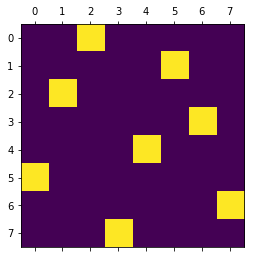

In [41]:
import matplotlib.pyplot as plt
plt.matshow(sol) # not better really. A terrible visualization


## Discrete Tomography

Suppose I have some blob on a grid that I can fire an xray through. The xray gets absorbed in proportion to the amount of material it has to pass through. 



In [ ]:
#Hmm. This one is also going to be very tempting to use psuedo boolean constraints on.




## Exercise:


Find logic puzzle, have them try to translate it to z3.



# SMT Solving


Z3 has significantly more capabilities than just SAT solving however. Z3 can search over things much more complicated than just boolean variables.

Satisfiability Modulo Theories (SMT) is an architecture/algorithm for search that extends the search methods of SAT solvers to more complex domains.

Z3 has solvers for

- linear equations
- linear inequalities
- integers
- algebraic numbers
- uninterpreted functions

As a sketch, it works roughly like this:

There are two layers the SMT solver is working at. There may be complex logical structure, but then there is the domain specific questions.

If we can abstract all complex facts like the truth of $x + y \gte 7$ as an opaque boolean variables $p$. We then use the technques of SAT solvers to find a satisfying assignement of these variables. But there are constraints required by the actual intepretation of the boolean variables that may not have been apparent. So we take the truth assignment and query a theory specific solver to see if that particular assignement is possible. If it is, we are done. If it is not, there is a reason it is not. We add this fact to our boolean formula and iterate.

In actual SMT solvers, there is no reason to not use domain specific information as early as possible. The only objective is to do things that are logically correct and as fast as possible. The SAT solving and the theory question may be very tightly interwoven.



# Examples


Theorems that will be difficult to get z3 to do:
sum n = n * (n + 1) / 2

Finite unrolling
f(100) = 100 + f(99) ...
(n <= 100) => f(n) == n * (n + 1) / 2


sort?
sorting network?

This is ridiculous and not even giving an honest picture
def merge():
    If(x )

def mergesort(x)
    xl , xr = cut(x)
    xl2 = mergesort(xl)
    xr2 = mergesort(xr)
    xret = Array(Int)
    s.add(xret == )
    return xret

z3 does have some built in stuff for arrays and lists.
def append():


prove( get(x, store(arr[x], y)) == y )
prove( get(x, store(arr[x], y)) == y )



## Apple Robot

## Controller Safety

## Simplifying Polynomial Equations

## Finding position of robot arm Inverse Kinematics






## First order logic feeling things
Socrates is a man


## State Machine? Protocol Something?
Maybe look in TLA+ book for some examples


## Toy Program Verification

Program analysis is a large subject.

def f(x : Int, y : Int):
   z = x + y
   z = z - 17
   if a <= 4:
      crash()
   return a
   
We'll do this example by hand in a somewhat ad-hoc manner, but conversion of a program to logical formula can be automated.
Use arrays?



## Solving a set of linear equations

In [53]:
x = Real("x")
y = Real("y")
s = Solver()
s.add(4*x + 4*y == 8)
s.add(2*x - 2*y == 2)
s.check()
s.model()

[y = 1/2, x = 3/2]

In [19]:
x = Real("x")
s = Solver()
s.add(2*x**3 + 4*x + 8 == 0)
s.check()
s.model()

[x = -1.1795090246?]

In [24]:
x = Real("x")
y = Real("y")
s = Solver()
s.add(x**2 + y**2 == 1)
s.add(x == 2*y)
s.check()
s.model()

[y = -0.4472135954?, x = -0.8944271909?]

## Proving properties of arithmetic



In [60]:
x = Real("x")
y = Real("y")
z = Real("z")
prove(x + y == y + x) #Commutativity

QED. No Counter example


In [62]:
prove(((x + y) + z) == ((x + (y + z)))) #associativity

QED. No Counter example


In [64]:
prove(x + 0 == x)

QED. No Counter example


In [65]:
prove(1 * x == x)

QED. No Counter example


In [66]:
prove(Or(x > 0, x < 0))

Counter example found:
[x = 0]


In [67]:
prove(Or(x > 0, x < 0, x == 0))

QED. No Counter example


In [68]:
prove(x**2 >= 0) #positivity of a square

QED. No Counter example


In [69]:
prove(x * (y + z) == x * y + x * z)

QED. No Counter example


In [70]:
prove(Implies( x >= 7 , x >= 4))

QED. No Counter example


In [71]:
prove(Implies( x >= -7 , x >= -4))

Counter example found:
[x = -5]


In [ ]:
#attempt the quantifier
x = Int('x')
Forall(x, If(x == 0 f(x) == x + )
       

In [32]:
x = Int("x")
y = Int("y")
def Even(x):
    q = FreshInt()
    return Exists([q], x == 2*q)
t = ForAll([x,y], Implies( And(Even(x), Even(y)) , Even(x + y)))
prove(t) # uhhh. Lemme think about this. I obviously did this wrong.

proved


In [33]:
x = Int("x")
y = Int("y")
def Even(x):
    q = FreshInt()
    return Exists([q], x == 2*q)
def Odd(x):
    return Not(Even(x))
def Odd(x):
    q = FreshInt()
    return Exists([q], x == 2*q + 1)
t = Implies( And(Even(x), Odd(y)) , Odd(x + y))
prove(t)

proved


## Geometric Theorem Proving

You can convert geometric theorems into systems of polynomial equations. This is sort of the converse of the above. We want Z3 to find a countermodel

Consider the following. You have a circle with a diameter. Pick an arbitrary point on the circle and connect it to the diameter. Is this angle a perpendicular angle?



When I draw it, it looks kind of close?
We can plug in some examples. That only shows that for those examples it works. Somewhat convincing though.

Pappus, Desargues?
Could I use a more axiomatic style?
Sort('Points')
Sort('Lines')


In [39]:
#Freely varying point on 
x = Real("x")
y = Real("y")
x1 = Real("x1")
y1 = Real("y1")
x2 = -x1
y2 = -y1
# assume horizontal line y = 0. Hits circle at x = 1, x = -1
d1 = (x - x1, y - y1)
d2 = (x - x2, y - y2)
perp = d1[0]*d2[0]+d1[1]*d2[1] == 0
prove(Implies(And(x**2 + y**2 == 1, x1**2 + y1**2 == 1), perp))


proved


In [40]:
x = Real("x")
y = Real("y")
# assume horizontal line y = 0. Hits circle at x = 1, x = -1
d1 = (x - 1, y)
d2 = (x + 1, y)
perp = d1[0]*d2[0]+d1[1]*d2[1] == 0
prove(Implies(x**2 + y**2 == 1, perp))

proved


In [13]:
f = Function("sumn", IntSort(), IntSort())
n = Int('n')

prove(Implies(And(f(0) == 0, n == 0), f(n) == n * (n + 1) / 2 ))

proved


In [9]:
prove( Implies(And(f(n) == n*(n + 1)/2, f(n+1) == n+1 + f(n)) ,  f(n+1) == (n+1)*(n+2)/2 ))

proved



Strengths of Z3:


Weaknesses:


SMT solvers can find things and exhaustively not find things. But that is about it. You sometimes need to massage a problem in that form. See the super optimizer example

Synthesis problems usually require more techniques

Not good at infinite things like recursion, loops, and induction.


## Other topics
- Quantifiers
- Optimization
- Algebraic Datatypes


## Other Solvers
(I am overwhelmed by the options and I'm into this stuff)

- Linear Algebra: numpy
- Convex Optimization Tools
- Linear Programming
- Mixed Integer Programming

- Minizinc
- Google-ORTools
- GAMS
- AMPL
- Cvxpy
- Pyomo
- Prolog
- Picat




# References

- rise4fun https://rise4fun.com/z3/tutorialcontent/guide
- https://ericpony.github.io/z3py-tutorial/guide-examples.htm
- Programming Z3 - https://theory.stanford.edu/~nikolaj/programmingz3.html
- Hakank's  http://www.hakank.org/z3/
- Yurichev's book "SMT by Example" https://yurichev.com/writings/SAT_SMT_by_example.pdf
- Z3 Tutorial paper
- http://www.cs.tau.ac.il/~msagiv/courses/asv/z3py/
- http://hackage.haskell.org/package/sbv

https://www.youtube.com/watch?v=ruNFcH-KibY Tikhon Jelvis - Analyzing Programs with Z3
